In [1]:
import os
import cmbagent
from PIL import Image
from google.genai import types
from google import genai

OAI_API_KEY = os.getenv('OPENAI_API_KEY')
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')

task = r"""
Create an HR diagram using synthetic data.
"""
results = cmbagent.one_shot(task,
                   max_rounds=50,
                   agent='engineer',
                   # agent='researcher',
                   engineer_model='gpt-4o-mini',
                   work_dir="/Users/kahaan/Downloads/cmbagent/output",
                  )


Create an HR diagram for stars using synthetic data.


--------------------------------------------------------------------------------

Calling engineer...

                 Model    agent    Cost  Prompt Tokens  Completion Tokens  Total Tokens
gpt-4o-mini-2024-07-18 engineer 0.00054           1583                500          2083
**Code Explanation:**

This code generates synthetic data for stars, including their absolute magnitudes and temperatures, and then creates a Hertzsprung-Russell (HR) diagram. The HR diagram is plotted with temperature on the x-axis and absolute magnitude on the y-axis. The plot is saved as a PNG file in the specified format.

**Modifications:** (Optional)

No modifications were necessary as this is the initial implementation.

**Python Code:**

```python
import numpy as np
import matplotlib.pyplot as plt
import time

def generate_synthetic_star_data(num_stars):
    """
    Generate synthetic data for stars.

    Parameters:
    num_stars (int): The number 

['/Users/kahaan/Downloads/cmbagent/output/data/hr_diagram_1_20250623-234431.png']
**Evaluation:** Major Error

**Rationale:**

As an expert astronomer evaluating this visualization titled "Hertzsprung-Russell Diagram," I identify two significant errors:

1.  **Incorrect X-Axis Orientation:** A fundamental convention of the Hertzsprung-Russell (HR) Diagram is that temperature (or spectral type) is plotted on the x-axis with **decreasing temperature from left to right**. This means hotter stars (higher Kelvin values) are on the left, and cooler stars (lower Kelvin values) are on the right. In the provided diagram, the "Temperature (K)" axis increases from left to right (from ~3000 K to ~30000 K), which is the opposite of the standard convention.

2.  **Lack of Characteristic Stellar Populations:** The defining feature of an HR Diagram is the distinct groupings of stars representing different stages of stellar evolution, such as the prominent Main Sequence, the Giant branch, and the White

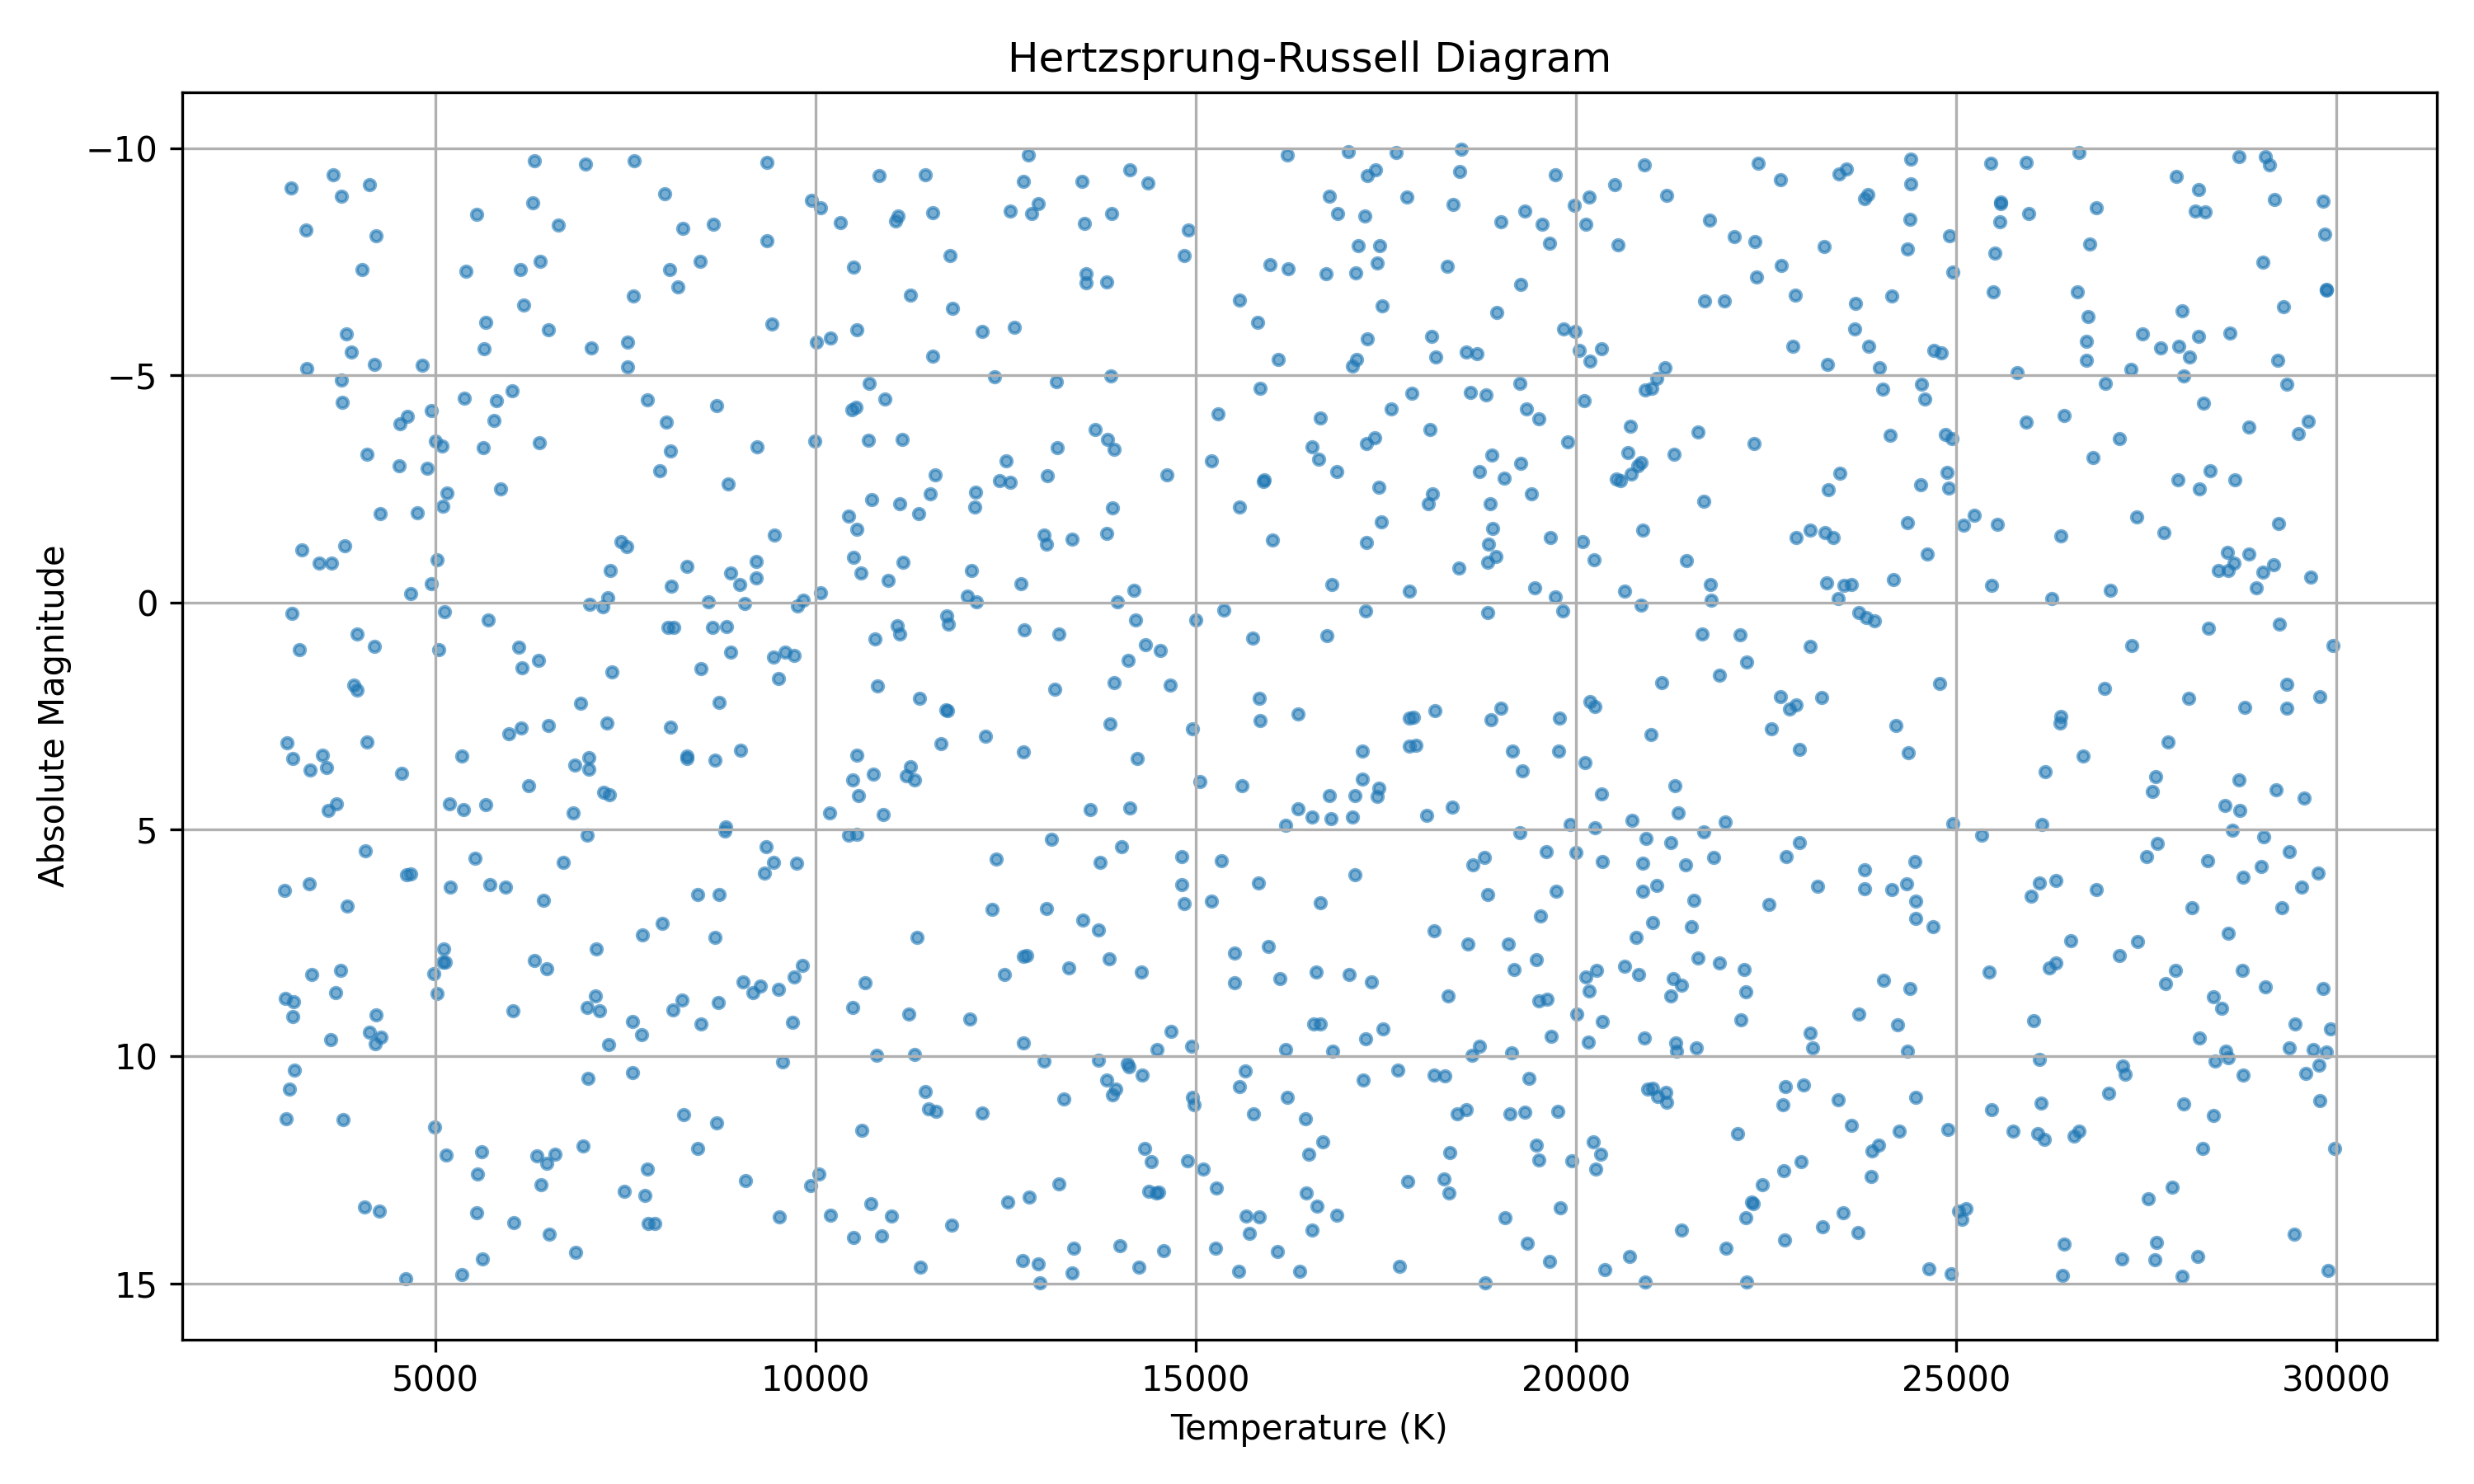

In [2]:
img_paths = results['final_context'].data['displayed_images']
final_img = img_paths[-1]
print(img_paths)

with open(final_img, 'rb') as f:
    image_bytes = f.read()
    client = genai.Client(api_key=GEMINI_API_KEY)
    
    response = client.models.generate_content(
        model='gemini-2.5-flash',
        contents=[
            types.Part.from_bytes(
                data=image_bytes,
                mime_type='image/png',
            ),
        """
        You are an expert astronomer. Your task is to evaluate the correctness and visual validity of 
        the visualuzation that will be sent to you. You will return with "No Error", "Minor Error", or
        "Major Error", along with your rationale.
        """
        ]
    )

print(response.text)
Image.open(final_img)